# Plot CV results for thesis

In [125]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='paper', style='ticks', font_scale=1)

from agape import *
repo, data = os.environ["POMBAGE"], os.environ["POMBAGEDATA"]
sys.path.append(repo)
from src import *

import json
from glob import glob
from collections import defaultdict
from agape.deepNF.performance import my_CV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
def mean(d):
    return np.mean(list(d.values()))

def std(d):
    return np.std(list(d.values()))

def load_performance(path, ontology, level):
    path = os.path.join(os.path.expandvars('$AGAPEDATA'), 'deepNF', 'results', f'{path}*{ontology}')
    if level:
        path = f'{path}_{level}'
    path = f'{path}.json'
    files = glob(path)
    with open(files[0], "rb") as f:
        d = json.load(f)
    return d

def plotter_3_levels(datapath, filename):
    fig, axes = plt.subplots(3, 4, figsize=(7,6))
    measures = ('M_AUPR', 'm_AUPR', 'accuracy', 'f1')
    ontologies = ("P", "F", "C")

    for i, level in enumerate(range(1, 4)):
        for j, measure in enumerate(measures):
            ax = axes[i,j]

            for x, ontology in enumerate(ontologies):
                d = load_performance(datapath, ontology, level)

                xs = []
                for r in range(1, 11):
                    xs.append(mean(d[f"repeat_{r}"][measure]))

                ax.bar(x, np.mean(xs), yerr=np.std(xs), fill=True, color=".75")

            if measure == 'accuracy':
                measure = measure.capitalize()
            if measure in ('M_AUPR', 'm_AUPR'):
                measure = measure.replace('_', ' ')

            ax.set_ylabel(measure)
            ax.set_ylim(0, 1)
            ax.set_xlabel('Ontology')
            ax.set_xticks(range(3))
            ax.set_xticklabels(ontologies)

            for tick in ax.get_xticklabels():
                tick.set_size(7)

    for i in range(3):
        ax = axes[i,0]
        ax.set_title(f"Level {i+1}", x=-1)

    fig.tight_layout()

    fig.savefig(filename) 

Separate structured prediction

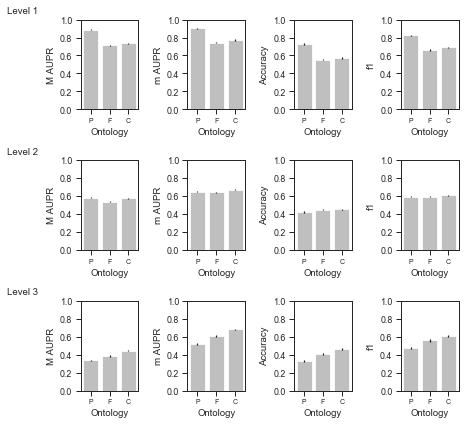

In [127]:
plotter_3_levels("180822_e56b613/", "mlp/cv_pombe_PFC_separate_MLP-512-256.pdf")

Structured prediction together

In [128]:
path = "180822_e56b613/structured/"

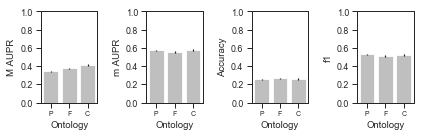

In [129]:
fig, axes = plt.subplots(1, 4, figsize=(6,2))
axes = axes.ravel()
measures = ('M_AUPR', 'm_AUPR', 'accuracy', 'f1')
ontologies = ("P", "F", "C")

for j, measure in enumerate(measures):
    ax = axes[j]

    for x, ontology in enumerate(ontologies):
        d = load_performance(path, ontology, None)

        xs = []
        for r in range(1, 11):
            xs.append(mean(d[f"repeat_{r}"][measure]))

        ax.bar(x, np.mean(xs), yerr=np.std(xs), fill=True, color=".75")

    if measure == 'accuracy':
        measure = measure.capitalize()
    if measure in ('M_AUPR', 'm_AUPR'):
        measure = measure.replace('_', ' ')

    ax.set_ylabel(measure)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Ontology')
    ax.set_xticks(range(3))
    ax.set_xticklabels(ontologies)

    for tick in ax.get_xticklabels():
        tick.set_size(7)

fig.tight_layout()

fig.savefig("mlp/cv_pombe_structured.pdf")

9 networks

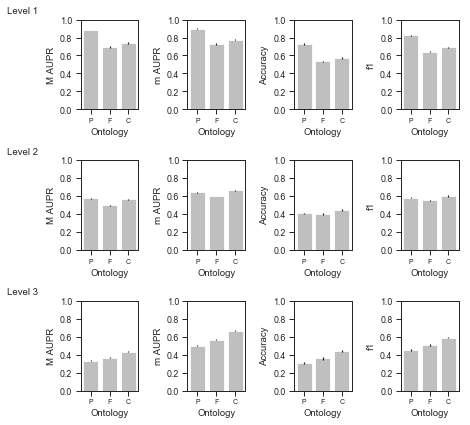

In [130]:
plotter_3_levels("180906_c4ae995/9_networks/", "mlp/cv_pombe_PFC_9-networks_separate_MLP-512-256.pdf")

PCNet

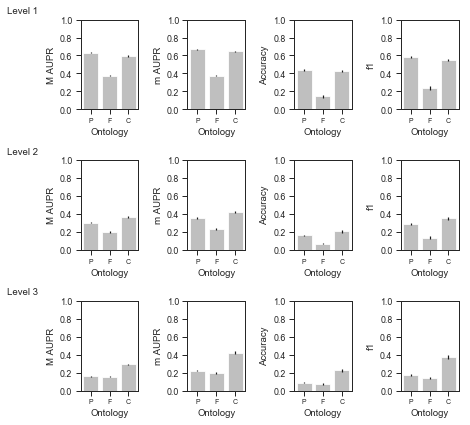

In [131]:
plotter_3_levels("180926_9d5c69e/", "mlp/cv_pombe_PFC_PCNet.pdf")